<a href="https://colab.research.google.com/github/MoonlightO2/Road-Accident-Data-Analysis-Project/blob/main/UK_Road_Accident_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UK Road Accident Data Analysis**
Article: https://medium.com/@mercymallel1/road-accidents-data-analysis-project-2d4fd1c9f429

Dataset: https://drive.google.com/file/d/1R_uaoZL18nRbqC_MULVne90h3SdRbAyn/view

From the analysis of the dataset, we can conclude that:

1. Casualties in the year 2021 were lower than in the tear 2020 across all months.

2. Car causes the highest number of casualties,79.8% of the total
casualties, followed by motorcycle while the agricultural vehicle causes the least number of casualties.

3. Single carriageway causes the highest number of casualties, 74.45% of the total casualties, while slip road had the least number of casualties.

4. Dry surface has the highest number of casualties,66.9%, followed by wet surface, 27.6%, then snow / ice surface, 5.5%, having the least number of casualties.

5. 38.77% of all the casualties happen in the rural areas while 61.23% of all casualties happen in the urban areas.

6. 72.98% of all casualties happens when the area is lit, either during the daylight or if its dark but the lights are lit, while 27.07% of all casualties happens when its dark.

7. 76.7% of all casualties / accidents happens during the day and 23.3% of all casualties / accidents happens at night.

In [1]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import IFrame

In [28]:
# mount datapath
data_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Road Accident Data Analysis/Road Accidents.csv'
html_file_path = '/content/drive/MyDrive/2. Projects/Colab Notebooks/Portfolio/Road Accident Data Analysis/Accidents_map.html'

In [3]:
# Load the dataset
df = pd.read_csv(data_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [5]:
df.columns.tolist()

['Accident_Index',
 'Accident Date',
 'Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Accident_Severity',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(District)',
 'Carriageway_Hazards',
 'Longitude',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']

In [6]:
# Define a dictionary for mapping old column names to new column names
column_name_mapping = {
    'Accident_Index': 'Accident Index',
    'Accident Date': 'Accident Date',
    'Day_of_Week': 'Day of Week',
    'Junction_Control': 'Junction Control',
    'Junction_Detail': 'Junction Detail',
    'Accident_Severity': 'Accident Severity',
    'Latitude': 'Latitude',
    'Light_Conditions': 'Light Conditions',
    'Local_Authority_(District)': 'Local Authority (District)',
    'Carriageway_Hazards': 'Carriageway Hazards',
    'Longitude': 'Longitude',
    'Number_of_Casualties': 'Number of Casualties',
    'Number_of_Vehicles': 'Number of Vehicles',
    'Police_Force': 'Police Force',
    'Road_Surface_Conditions': 'Road Surface Conditions',
    'Road_Type': 'Road Type',
    'Speed_limit': 'Speed limit',
    'Time': 'Time',
    'Urban_or_Rural_Area': 'Urban or Rural Area',
    'Weather_Conditions': 'Weather Conditions',
    'Vehicle_Type': 'Vehicle Type'
}

# Rename the columns using the mapping dictionary
df = df.rename(columns=column_name_mapping)

In [7]:
# Now df contains the DataFrame with the updated column names
# You can save it back to a CSV file or continue with your analysis
# For example:
df.to_csv('Road Accidents Dataset.csv', index=False)

In [8]:
df.describe

<bound method NDFrame.describe of        Accident Index Accident Date Day of Week              Junction Control  \
0       200901BS70001    2021-01-01    Thursday      Give way or uncontrolled   
1       200901BS70002    2021-01-05      Monday      Give way or uncontrolled   
2       200901BS70003    2021-01-04      Sunday      Give way or uncontrolled   
3       200901BS70004    2021-01-05      Monday           Auto traffic signal   
4       200901BS70005    2021-01-06     Tuesday           Auto traffic signal   
...               ...           ...         ...                           ...   
307968  201091NM01760    2022-02-18    Thursday  Data missing or out of range   
307969  201091NM01881    2022-02-21      Sunday  Data missing or out of range   
307970  201091NM01935    2022-02-23     Tuesday      Give way or uncontrolled   
307971  201091NM01964    2022-02-23     Tuesday      Give way or uncontrolled   
307972  201091NM02142    2022-02-28      Sunday      Give way or uncontroll

In [9]:
df.head(2)

,Accident Index,Accident Date,Day of Week,Junction Control,Junction Detail,Accident Severity,Latitude,Light Conditions,Local Authority (District),Carriageway Hazards,...,Number of Casualties,Number of Vehicles,Police Force,Road Surface Conditions,Road Type,Speed limit,Time,Urban or Rural Area,Weather Conditions,Vehicle Type
0,200901BS70001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car


In [10]:
# Replace 'Fetal' with 'Fatal' in the 'Accident Severity' column
df['Accident Severity'] = df['Accident Severity'].replace('Fetal', 'Fatal')

In [11]:
# Iterate through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for {column}:\n{unique_values}\n')

Unique values for Accident Index:
['200901BS70001' '200901BS70002' '200901BS70003' ... '201091NM01935'
 '201091NM01964' '201091NM02142']

Unique values for Accident Date:
['2021-01-01' '2021-01-05' '2021-01-04' '2021-01-06' '2021-01-08'
 '2021-01-02' '2021-01-07' '2021-01-10' '2021-01-16' '2021-01-12'
 '2021-01-09' '2021-01-17' '2021-01-25' '2021-01-26' '2021-01-19'
 '2021-01-27' '2021-01-21' '2021-01-22' '2021-01-31' '2021-02-03'
 '2021-01-29' '2021-01-28' '2021-01-20' '2021-01-15' '2021-02-09'
 '2021-01-23' '2021-02-10' '2021-01-30' '2021-02-12' '2021-02-16'
 '2021-02-14' '2021-02-18' '2021-02-21' '2021-02-15' '2021-02-20'
 '2021-02-27' '2021-01-18' '2021-02-07' '2021-02-23' '2021-02-22'
 '2021-02-26' '2021-03-04' '2021-03-03' '2021-03-06' '2021-02-17'
 '2021-03-09' '2021-03-10' '2021-03-02' '2021-02-25' '2021-03-14'
 '2021-02-28' '2021-02-11' '2021-03-01' '2021-03-13' '2021-03-17'
 '2021-02-24' '2021-03-20' '2021-02-05' '2021-03-21' '2021-03-24'
 '2021-03-23' '2021-03-25' '2021-03-2

In [12]:
# Iterate through each column and print the number of unique values
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values for {column}: {num_unique_values}')

Number of unique values for Accident Index: 197644
Number of unique values for Accident Date: 730
Number of unique values for Day of Week: 7
Number of unique values for Junction Control: 7
Number of unique values for Junction Detail: 9
Number of unique values for Accident Severity: 3
Number of unique values for Latitude: 264362
Number of unique values for Light Conditions: 5
Number of unique values for Local Authority (District): 422
Number of unique values for Carriageway Hazards: 6
Number of unique values for Longitude: 269856
Number of unique values for Number of Casualties: 28
Number of unique values for Number of Vehicles: 17
Number of unique values for Police Force: 51
Number of unique values for Road Surface Conditions: 5
Number of unique values for Road Type: 5
Number of unique values for Speed limit: 8
Number of unique values for Time: 1439
Number of unique values for Urban or Rural Area: 2
Number of unique values for Weather Conditions: 8
Number of unique values for Vehicle T

In [13]:
# Create a DataFrame with column names and their corresponding number of unique values
unique_counts = pd.DataFrame({
    'Column': df.columns,
    'Number of Unique Values': [df[column].nunique() for column in df.columns]
})

# Sort the DataFrame by the number of unique values in descending order
unique_counts_sorted = unique_counts.sort_values(by='Number of Unique Values', ascending=False)

# Print the sorted DataFrame
print(unique_counts_sorted)

                        Column  Number of Unique Values
10                   Longitude                   269856
6                     Latitude                   264362
0               Accident Index                   197644
17                        Time                     1439
1                Accident Date                      730
8   Local Authority (District)                      422
13                Police Force                       51
11        Number of Casualties                       28
12          Number of Vehicles                       17
20                Vehicle Type                       15
4              Junction Detail                        9
16                 Speed limit                        8
19          Weather Conditions                        8
2                  Day of Week                        7
3             Junction Control                        7
9          Carriageway Hazards                        6
7             Light Conditions                  

## **1. Histogram for 'Number of Casualties'**

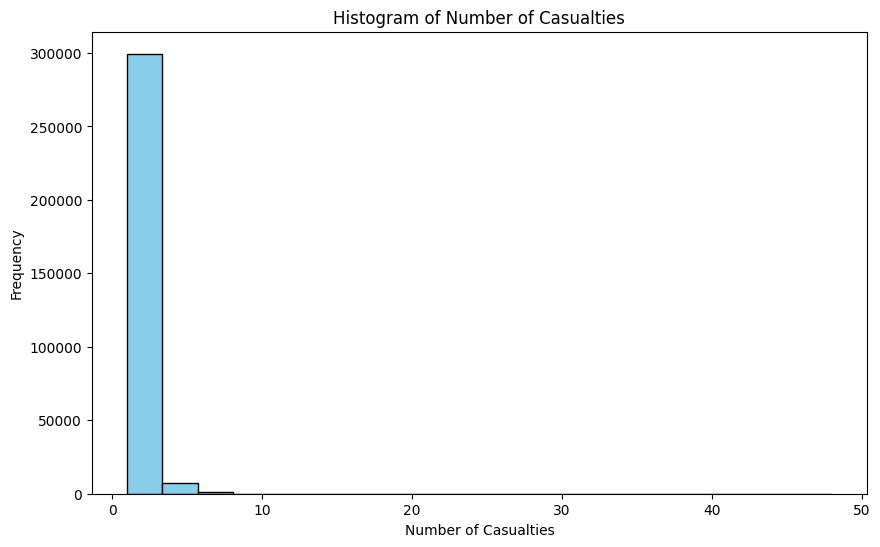

In [14]:
# Plot a histogram for 'Number of Casualties'
plt.figure(figsize=(10, 6))
plt.hist(df['Number of Casualties'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.show()

## **2. Bar Chart for 'Accident Severity'**

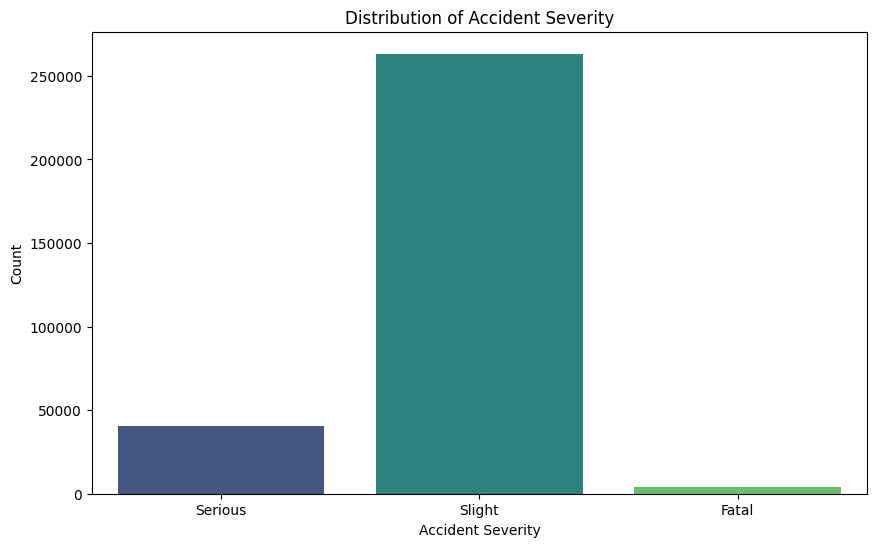

In [15]:
# Plot a bar chart for 'Accident Severity'
plt.figure(figsize=(10, 6))
sns.countplot(x='Accident Severity', data=df, palette='viridis')
plt.title('Distribution of Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()

## **3. Scatter Plot for 'Latitude' and 'Longitude'**

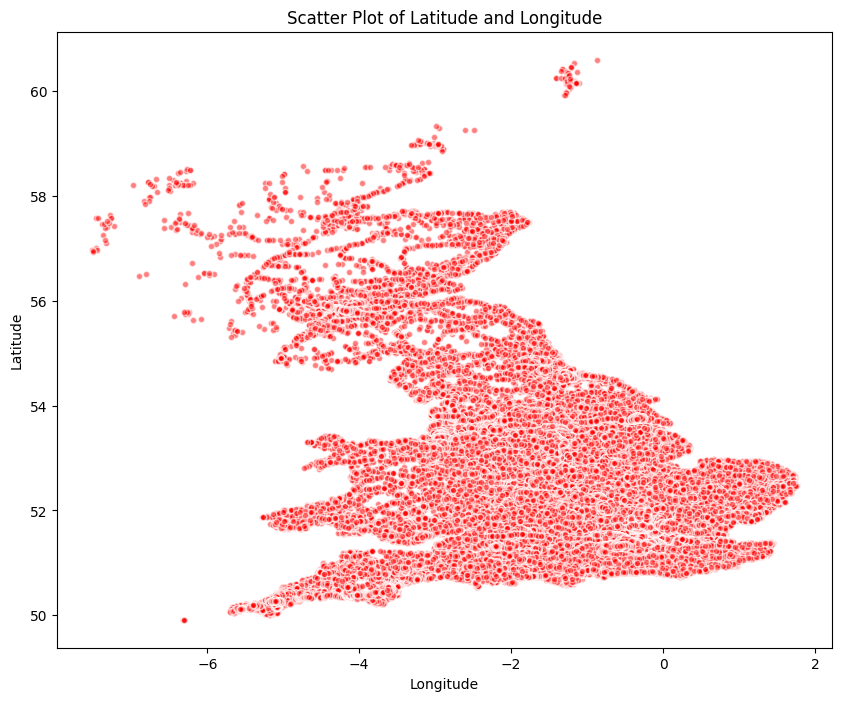

In [16]:
# Plot a scatter plot for 'Latitude' and 'Longitude'
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='red', edgecolors='w', s=20)
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## **4. Boxplot for 'Number of Vehicles' by 'Accident Severity'**

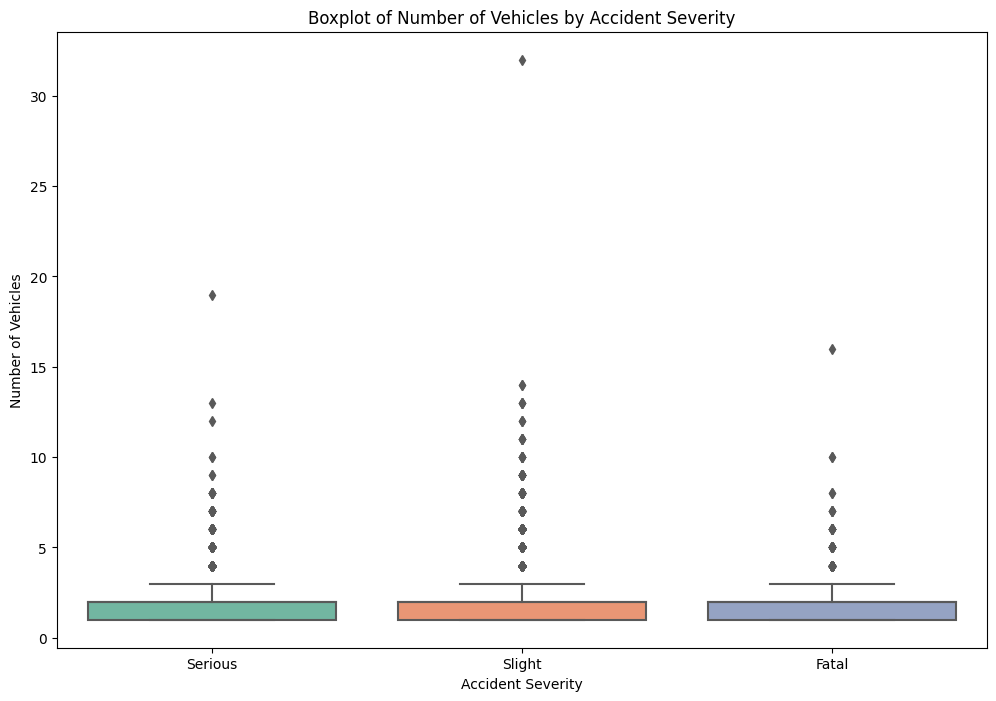

In [17]:
# Plot a boxplot for 'Number of Vehicles' by 'Accident Severity'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Accident Severity', y='Number of Vehicles', data=df, palette='Set2')
plt.title('Boxplot of Number of Vehicles by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Vehicles')
plt.show()

## **5. Countplot for 'Day of Week'**

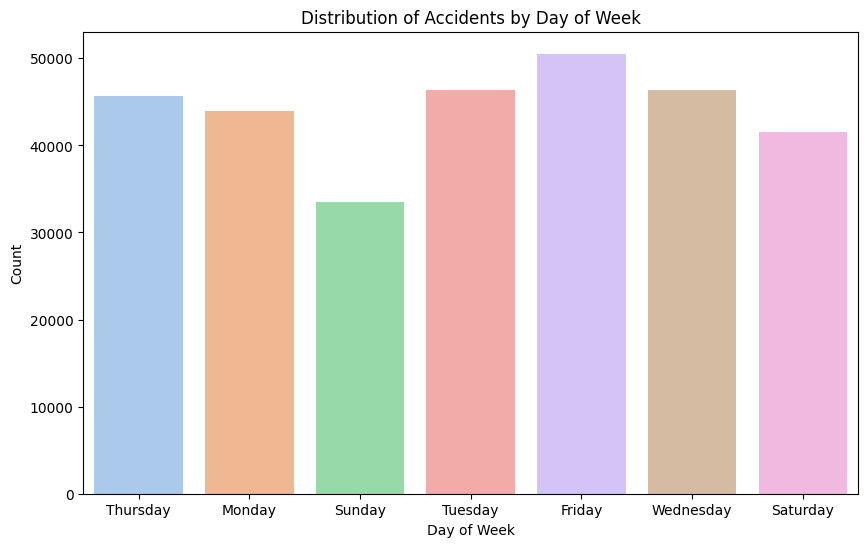

In [18]:
# Plot a countplot for 'Day of Week'
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df, palette='pastel')
plt.title('Distribution of Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

## **6. Pie Chart based on Accident Severity**

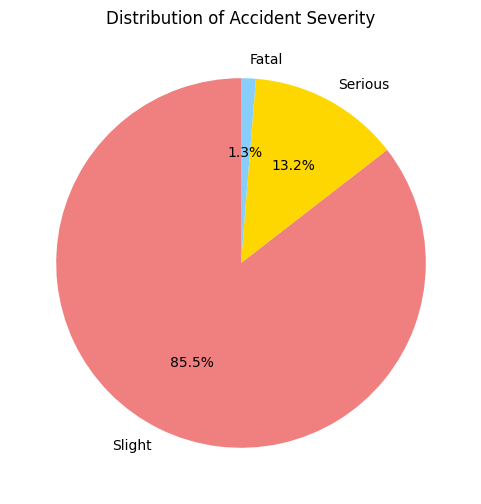

In [19]:
# Plot a pie chart for the distribution of Accident Severity
severity_counts = df['Accident Severity'].value_counts()
labels = severity_counts.index
values = severity_counts.values

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'gold', 'lightskyblue'])
plt.title('Distribution of Accident Severity')
plt.show()

## **7. Accidents vs Type of Vehicle**

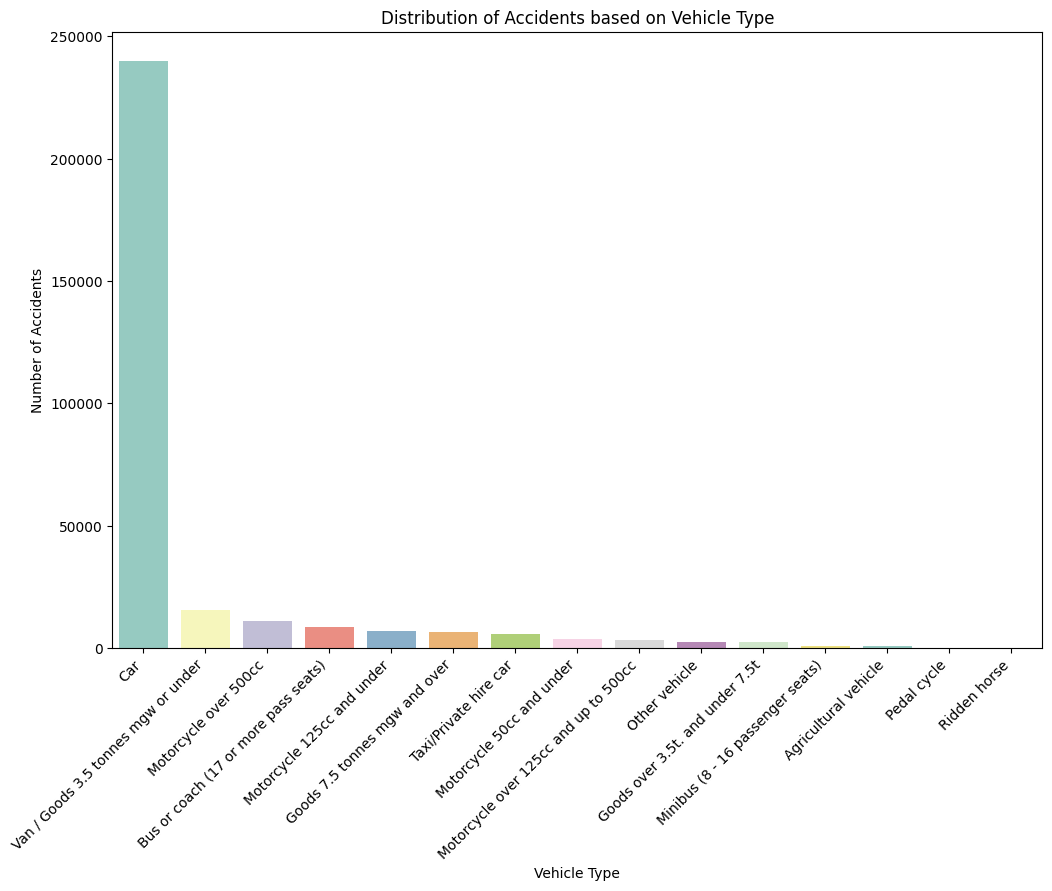

In [20]:
# Plot a bar chart for accidents based on the type of vehicle
plt.figure(figsize=(12, 8))
sns.countplot(x='Vehicle Type', data=df, palette='Set3', order=df['Vehicle Type'].value_counts().index)
plt.title('Distribution of Accidents based on Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## **8. Accidents vs Road Type**

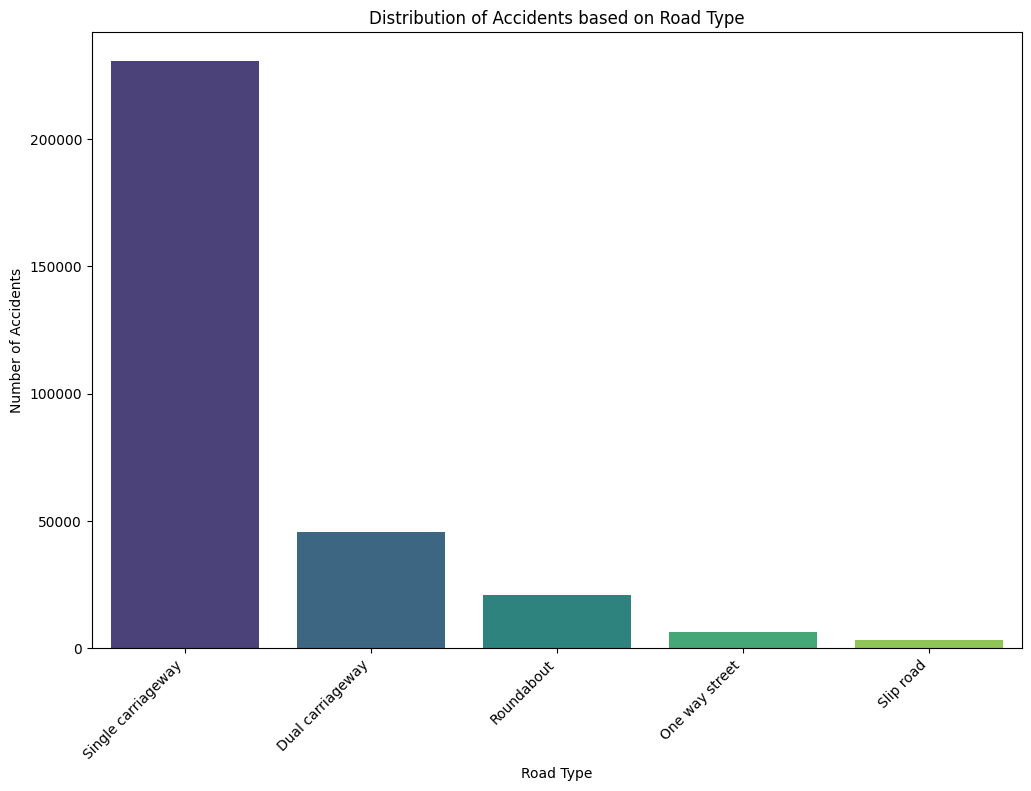

In [21]:
# Plot a bar chart for accidents based on road type
plt.figure(figsize=(12, 8))
sns.countplot(x='Road Type', data=df, palette='viridis', order=df['Road Type'].value_counts().index)
plt.title('Distribution of Accidents based on Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## **9. Accidents vs Road Surface**

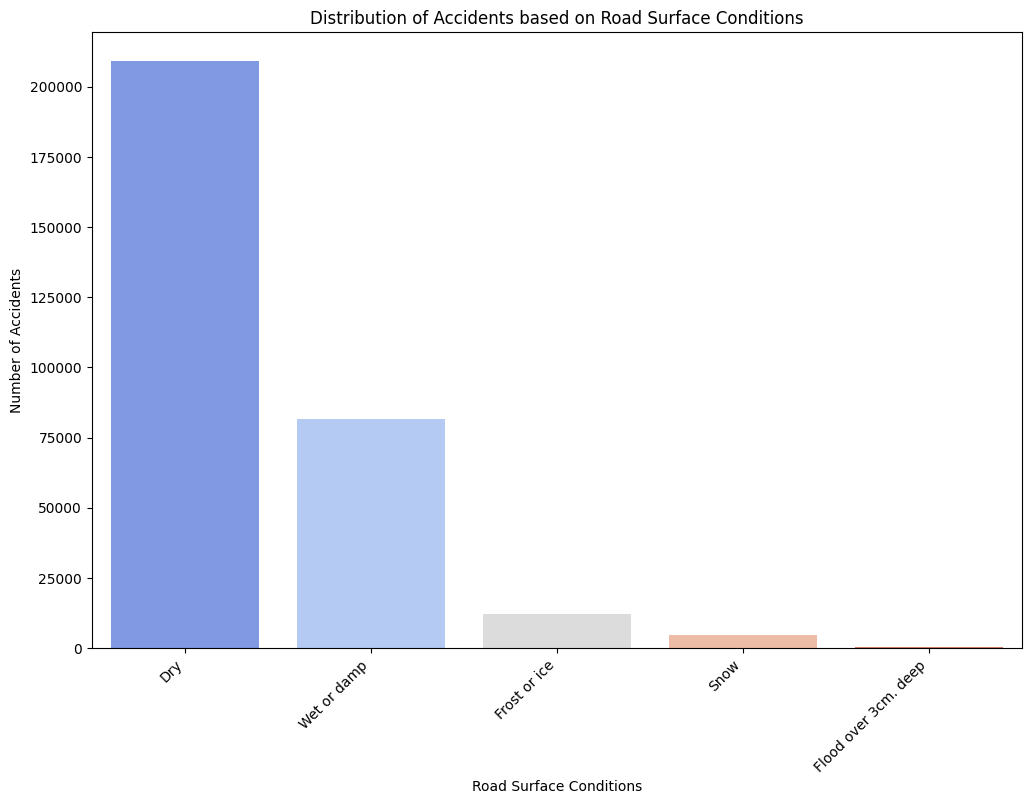

In [22]:
# Plot a bar chart for accidents based on road surface conditions
plt.figure(figsize=(12, 8))
sns.countplot(x='Road Surface Conditions', data=df, palette='coolwarm', order=df['Road Surface Conditions'].value_counts().index)
plt.title('Distribution of Accidents based on Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## **10. Location (Rural or Urban)**

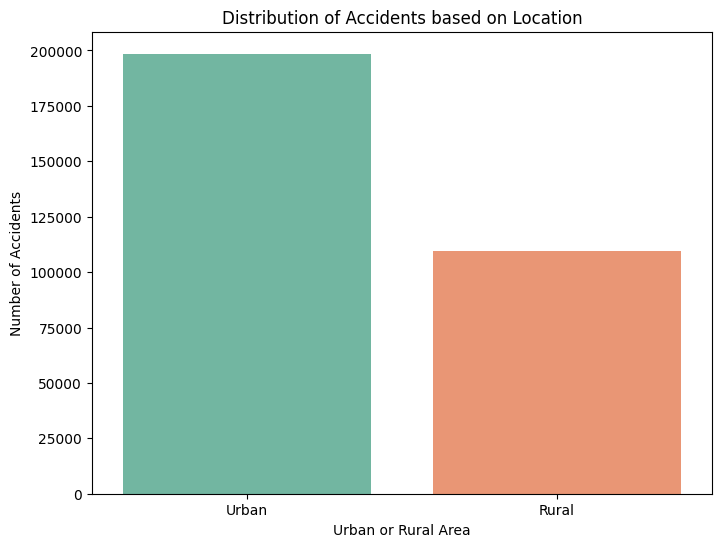

In [23]:
# Plot a bar chart for accidents based on location (rural or urban)
plt.figure(figsize=(8, 6))
sns.countplot(x='Urban or Rural Area', data=df, palette='Set2')
plt.title('Distribution of Accidents based on Location')
plt.xlabel('Urban or Rural Area')
plt.ylabel('Number of Accidents')
plt.show()

## **11. Light Conditions (Dark vs Daylight)**

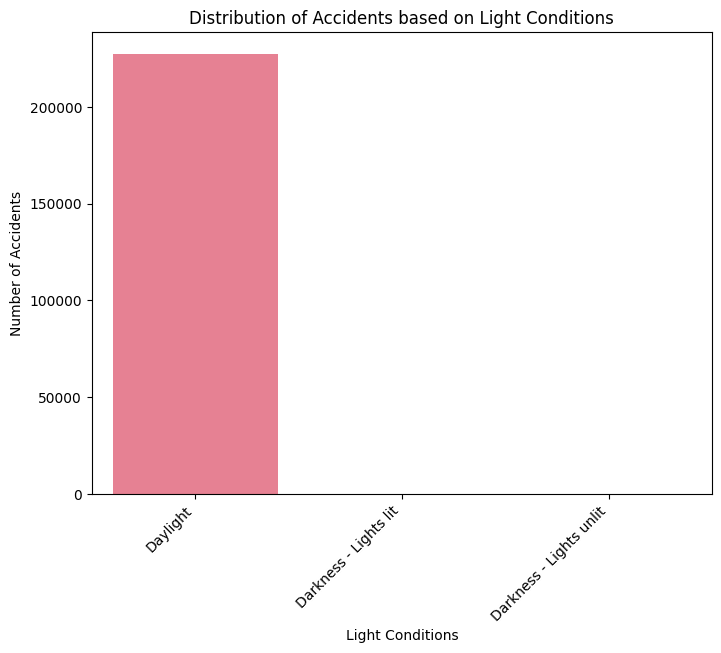

In [24]:
# Plot a bar chart for accidents based on light conditions (dark vs daylight)
plt.figure(figsize=(8, 6))
sns.countplot(x='Light Conditions', data=df, palette='husl', order=['Daylight', 'Darkness - Lights lit', 'Darkness - Lights unlit'])
plt.title('Distribution of Accidents based on Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## **12. 2021 vs 2022 Casualties monthly trend**

<ipython-input-25-6a30ddb62b95>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Number of Casualties', hue='Year', data=df_2021_2022, ci=None, marker='o')


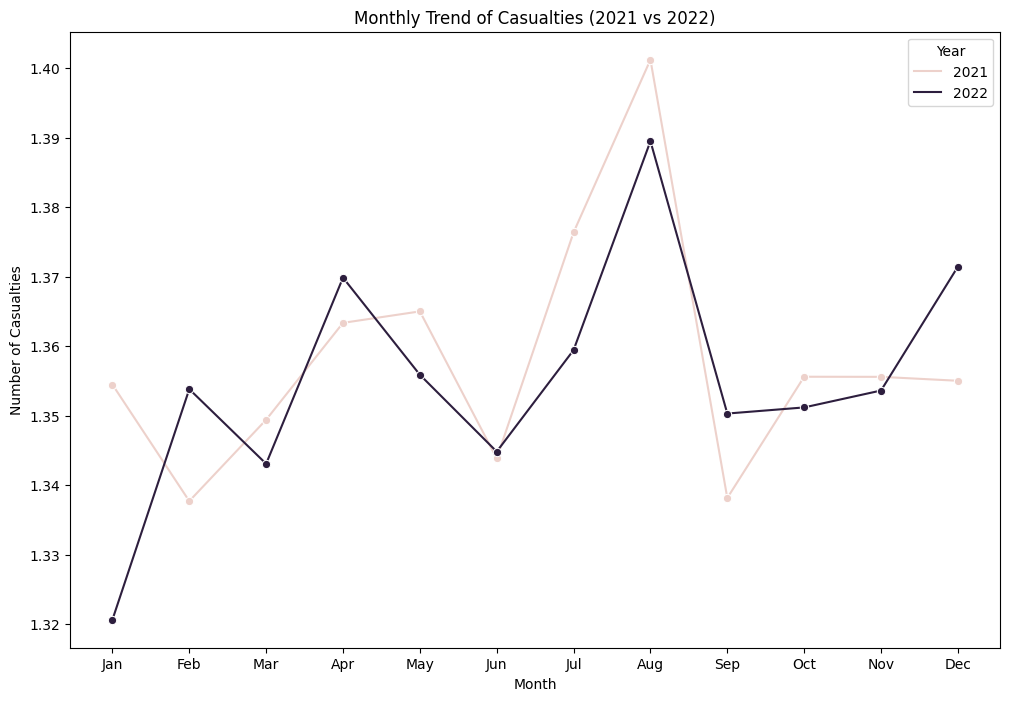

In [25]:
# Convert 'Accident Date' to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

# Extract year and month information
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month

# Filter data for the years 2021 and 2022
df_2021_2022 = df[df['Year'].isin([2021, 2022])]

# Plot the monthly trend of casualties for 2021 and 2022
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Number of Casualties', hue='Year', data=df_2021_2022, ci=None, marker='o')
plt.title('Monthly Trend of Casualties (2021 vs 2022)')
plt.xlabel('Month')
plt.ylabel('Number of Casualties')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

## **13. Time of Day / Night**

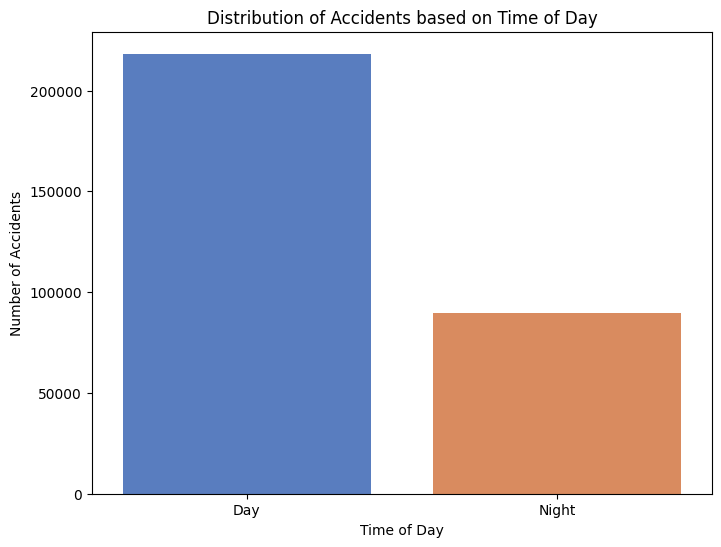

In [26]:
# Clean the 'Time' column by dropping rows with invalid values
df = df.dropna(subset=['Time'])
df = df[df['Time'].str.contains(':')]  # Assuming valid times contain a colon

# Extract the hour information from the 'Time' column
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Drop rows with NaN values in the 'Hour' column (resulting from invalid time values)
df = df.dropna(subset=['Hour'])

# Categorize the hours into 'Day' and 'Night' based on a threshold
threshold = 6  # 6 AM
df['Day or Night'] = df['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# Plot a bar chart for accidents based on time of day
plt.figure(figsize=(8, 6))
sns.countplot(x='Day or Night', data=df, palette='muted')
plt.title('Distribution of Accidents based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

## **14. Accidents Map**

In [ ]:
import folium
from IPython.display import IFrame, display

# Create a folium map centered at the mean of Latitude and Longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=10)

# Add markers for each location in the DataFrame
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Accident Index']).add_to(my_map)

# Save the map as an HTML file
my_map.save(html_file_path)

# Display the map in the Colab notebook using display module
display(IFrame(src=html_file_path, width=700, height=600))